# Exploratory Data Analysis (EDA)


## 1. Imports & Setup

In [3]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno  # For visualizing missing data
%matplotlib inline


## 2. About the Data

The **GDELT Project** (Global Database of Events, Language, and Tone) is an open-source initiative that monitors news media from around the world in real time. It collects and analyzes news reports in over 100 languages, using machine learning to identify and catalog global events, emotions, themes, and narratives.

GDELT is widely used for tracking events such as natural disasters, social unrest, conflict, and humanitarian crises. For this project, we use GDELT to analyze Natural Catastrophe (Nat-Cat) events globally.

### Types of Data Provided by GDELT
GDELT offers two main datasets:
- **GDELT 1.0 Event Database**: Focuses on political events and interactions between actors.
- **GDELT 2.0 Global Knowledge Graph (GKG)**: Captures themes, emotions, locations, and metadata from news articles. 

**The data used in this project uses the GKG dataset, which is mainly focused on Nat Cat events.**

### How to Access GDELT Data
There are several ways to fetch data from GDELT:
1. **Using the GDELT API**: GDELT provides a public API to access real-time or historical news data. We can query for specific events, keywords, or time ranges.
    Example: https://api.gdeltproject.org/api/v2/doc/doc?query=earthquake&mode=ArtList&format=json&sort=DateDesc&timespan=7%20days

2. **Python Packages**: We can use `gdeltdoc` Python package, this makes it easy to interact with the GDELT API from the code. Install it using:
   ```bash
   pip install gdeltdoc
   ```
3. **Direct API Calls**: We can use Python's `requests` library or any HTTP client to call the API directly.


#### API Modes (Key Endpoints)
| Mode           | Purpose                                              |
|--------------- |------------------------------------------------------|
| ArtList        | Retrieve a list of matching articles with metadata  |
| TimelineVol    | Timeline of number of matching articles over time   |
| TimelineTone   | Timeline of average tone of articles over time      |
| ImageCollage   | Collage of images from articles                    |
| WordCloud      | Visualize frequent keywords or themes              |

**Note:** The CSV file used in this analysis was retrieved using the `ArtList` mode, with the event type as a parameter.

### Data File Used
- The file `Nat Cat Events - Raw data.csv` contains news articles about natural catastrophe events, fetched from GDELT using the API as described above.
- If we want to fetch similar data for other events or time periods, we can modify the API query accordingly.

For more details, visit the [GDELT Project website](https://www.gdeltproject.org/) and the [GDELT API documentation](https://blog.gdeltproject.org/gdelt-2-0-our-global-world-in-realtime/).

In [15]:
# Sample code to fetch data from GDELT API using requests
import requests

# Define API endpoint and parameters
url = "https://api.gdeltproject.org/api/v2/doc/doc"
params = {
    "query": "earthquake",  # Search for articles about climate change
    "mode": "ArtList",          # Return a list of articles
    "maxrecords": 10,            # Limit to 10 articles
    "format": "json",           # Get results in JSON format
    "startdatetime" : 20250701000000, # Start date (YYYYMMDDHHMMSS)
    "enddatetime" : 20250801000000, # End date (YYYYMMDDHHMMSS)
    "sourcelang" : "en"
}

# Make the API request
response = requests.get(url, params=params)
data = response.json()

# Convert the articles to a DataFrame for easy viewing
sample_articles_df = pd.DataFrame(data['articles'])
sample_articles_df.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,http://www.haberler.com/haberler/son-depremler...,https://www.haberler.com/amp/son-depremler-bug...,Son Depremler ! Bugün İstanbulda deprem mi old...,20250707T213000Z,https://foto.haberler.com/haber/2025/07/07/son...,haberler.com,Turkish,Turkey
1,http://www.haberler.com/haberler/son-depremler...,https://www.haberler.com/amp/son-depremler-bug...,Son Depremler ! Bugün İstanbulda deprem mi old...,20250709T213000Z,https://foto.haberler.com/haber/2025/07/09/son...,haberler.com,Turkish,Turkey
2,http://www.haberler.com/haberler/son-depremler...,https://www.haberler.com/amp/son-depremler-bug...,Son Depremler ! Bugün İstanbulda deprem mi old...,20250710T223000Z,https://foto.haberler.com/haber/2025/07/11/son...,haberler.com,Turkish,Turkey
3,https://www.cnnturk.com/turkiye/deprem-son-dak...,,DEPREM SON DAKİKA ! 7 Temmuz Pazartesi deprem ...,20250707T071500Z,https://image.cnnturk.com/i/cnnturk/75/1200x67...,cnnturk.com,Turkish,Turkey
4,https://www.cnnturk.com/turkiye/deprem-son-dak...,,DEPREM SON DAKİKA ! 8 Temmuz Salı deprem mi ol...,20250708T071500Z,https://image.cnnturk.com/i/cnnturk/75/1200x67...,cnnturk.com,Turkish,Turkey


**Output:**
- The resulting DataFrame contains columns such as below representing metadata about a news article.
    - `url` : Link to the desktop version of the news article.
    - `url_mobile` : Link to the mobile-optimized version of the news article.
    - `title` : Headline or title of the news article.
    - `seendate` : Date and time when the article was first seen by GDELT.
    - `socialimage` : URL of the main image associated with the article (for sharing/social media).
    - `domain` : The domain name of the news source (e.g., bbc.com).
    - `language` : The language in which the article is written.
    - `sourcecountry` : Source country of the article.
    

- We can modify the `query` parameter to fetch articles about other topics or events.

## 3. Data Loading & Overview
Data is already available in the CSV file and need to be loaded

In [ ]:
# Load the dataset 
df = pd.read_csv('../data/Nat Cat Events - Raw data.csv')  # Update path if needed

# Display the first 5 rows to get a quick overview of the data
df.head()

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
0,https://www.wpri.com/weather/severe-weather/20...,https://www.wpri.com/weather/severe-weather/20...,2023 was a year of extreme weather in Southern...,20240101T223000Z,https://www.wpri.com/wp-content/uploads/sites/...,wpri.com,English,United States
1,https://volcanoes.usgs.gov/hans2/view/notice/D...,NaN,HAWAIIAN VOLCANO OBSERVATORY DAILY UPDATE Mond...,20240101T220000Z,NaN,volcanoes.usgs.gov,English,United States
2,https://www.ktbs.com/online_features/home_impr...,NaN,How to Protect Your Family from Tornadoes,20240101T124500Z,https://bloximages.newyork1.vip.townnews.com/k...,ktbs.com,English,United States
3,https://www.ctvnews.ca/climate-and-environment...,NaN,Iceland volcanoes bring tourists to island cou...,20240101T223000Z,https://www.ctvnews.ca/content/dam/ctvnews/en/...,ctvnews.ca,English,Canada
4,https://www.berkshireeagle.com/online_features...,NaN,How to Protect Your Family from Tornadoes,20240101T090000Z,https://bloximages.newyork1.vip.townnews.com/b...,berkshireeagle.com,English,United States


### Basic Info & Structure

In [ ]:
# Display concise summary of the DataFrame, including column types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91479 entries, 0 to 91478
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   url            91479 non-null  object
 1   url_mobile     25383 non-null  object
 2   title          91384 non-null  object
 3   seendate       91479 non-null  object
 4   socialimage    79390 non-null  object
 5   domain         91479 non-null  object
 6   language       91479 non-null  object
 7   sourcecountry  89958 non-null  object
dtypes: object(8)
memory usage: 5.6+ MB


In [ ]:
# Generate descriptive statistics for all columns (including categorical)
# This helps to understand distributions, unique values, and spot potential data issues

df.describe(include='all')

,url,url_mobile,title,seendate,socialimage,domain,language,sourcecountry
count,91479,25383,91384,91479,79390,91479,91479,89958
unique,89303,24501,65158,23354,63431,5878,1,135
top,https://www.yahoo.com/news/forest-greene-mount...,https://www.aljazeera.com/amp/news/liveblog/20...,2 . 9 Magnitude Earthquake Reported In US,20240829T073000Z,https://i.iheart.com/v3/re/new_assets/6653968c...,yahoo.com,English,United States
freq,2,23,212,71,236,4691,91479,59232


This shows that there exists missing data in many columns of the dataset. 
Also can see freq in all the columns which shows there exists duplicate data.

## 4. Non Null vs Unique values in the dataset columns

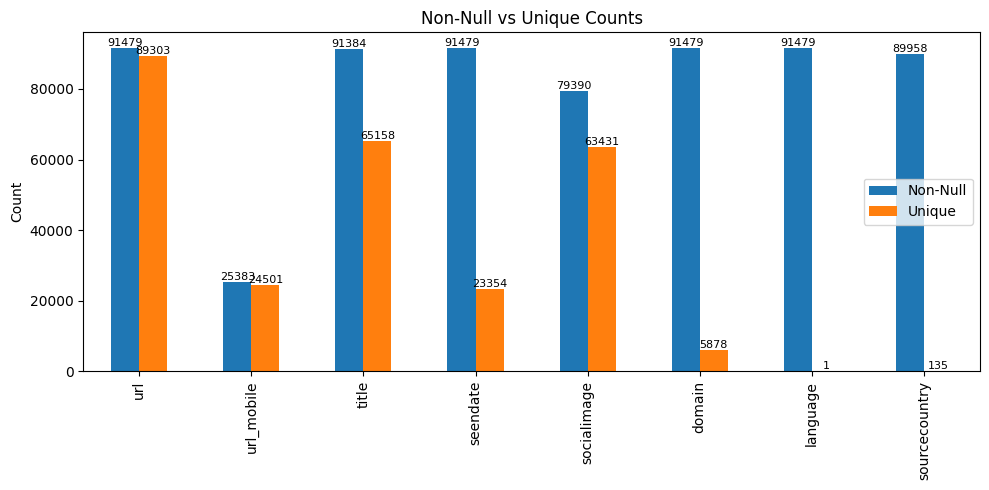

In [ ]:
# Calculate non-null and unique value counts for each column
# This helps to identify columns with duplicates or missing data

total = df.count()
unique = df.nunique()

df_counts = pd.DataFrame({'Non-Null': total, 'Unique': unique})

# Plot non-null vs unique counts for each column
ax = df_counts.plot(kind='bar', figsize=(10,5), title='Non-Null vs Unique Counts')
plt.ylabel('Count')

# Add value labels to each bar
for bars in ax.containers:
    ax.bar_label(bars, fontsize=8)

plt.tight_layout()
plt.show()

Observations:
- This shows that duplicate values exist in all the columns of data.
- url_mobile is having many missing values, and is fine as not all articles have mobile optimised separate urls.
- Can be seen a total of 65158 unique title is available, this is due to multiple urls have same title. For example, if any disaster occured, then multiple news channel prints the same title or same article is published in multiple websites.
- socialimage url is available only for 63431 articles and not all articles contains images.
- `English` is the source language for all the articles.
- Articles related to 135 source countries are available in our dataset.


## 5. Missing Data Analysis

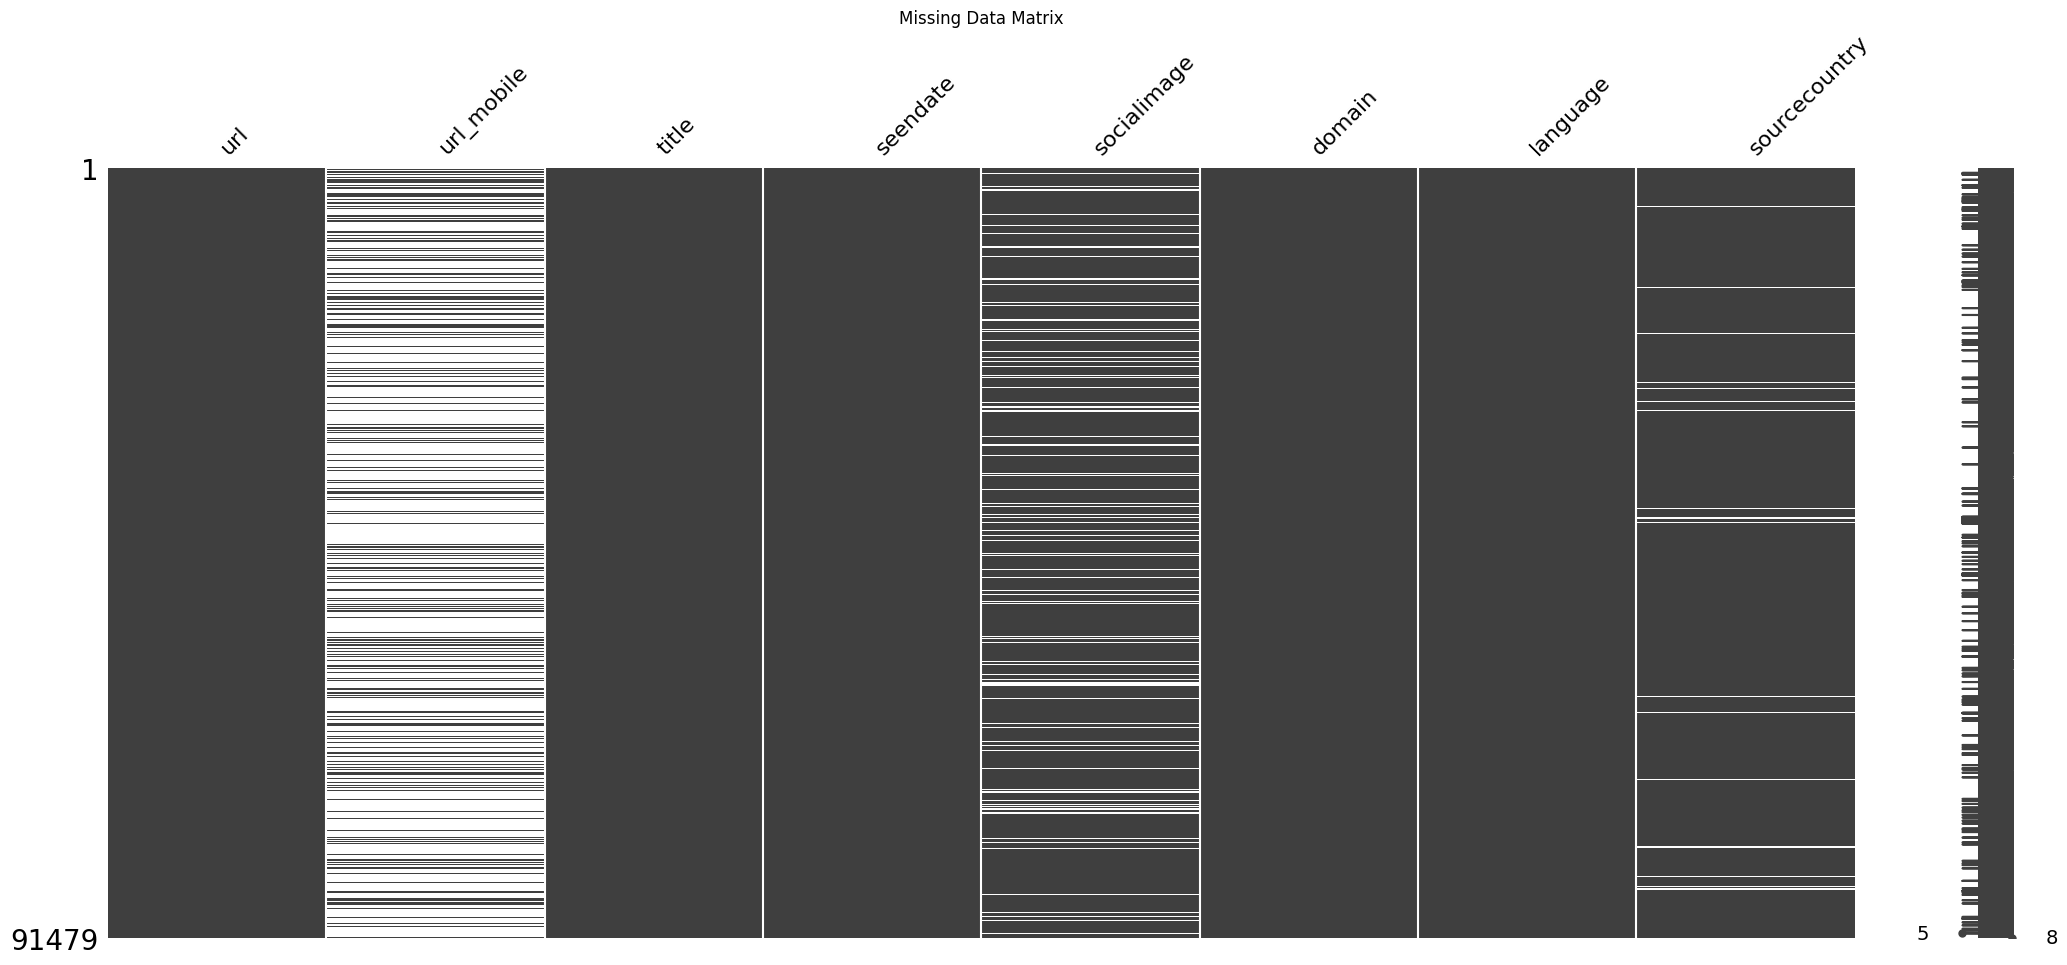

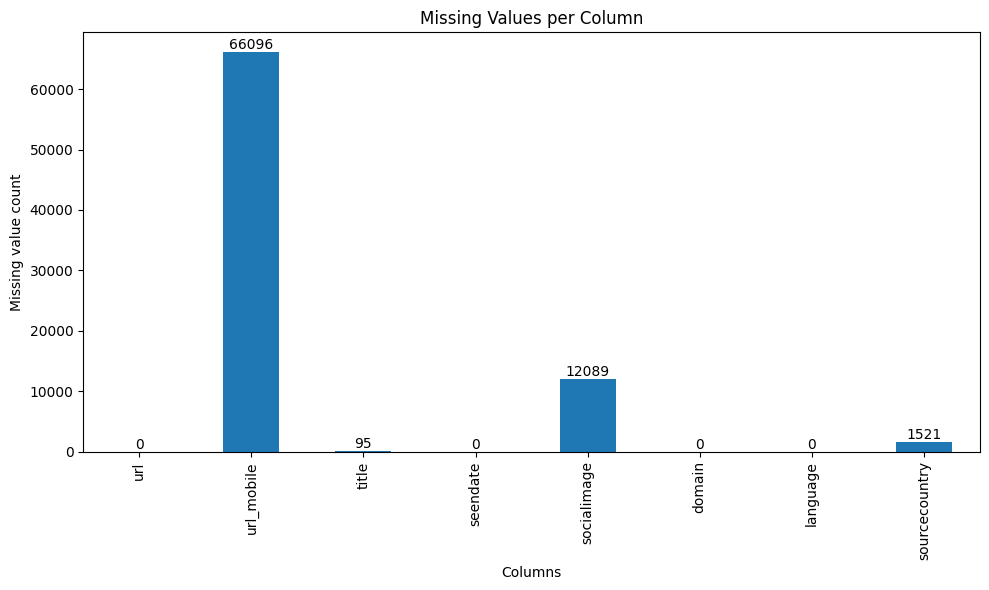

url                  0
url_mobile       66096
title               95
seendate             0
socialimage      12089
domain               0
language             0
sourcecountry     1521
dtype: int64


In [ ]:
# Visualize missing data using missingno
msno.matrix(df)  # Shows a matrix of missing values
plt.title('Missing Data Matrix')
plt.show()

# Bar plot of missing values per column using matplotlib
missing_counts = df.isnull().sum()
ax = missing_counts.plot(kind='bar', figsize=(10,6), title='Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing value count')

# Add count above each bar
for i, value in enumerate(missing_counts):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print missing data count for reference
print(missing_counts)

Above data shows that columns url_mobile, socialimage, sourcecountry has most number of missing values.
- url_mobile - A mobile-friendly version of the URL, often used for rendering the article on mobile devices. Not all articles have one, so it can be null for some articles.
- socialimage - URL to a representative image used in the article. Not all articles have one, so it can be null for some articles.
- sourcecountry - The country associated with the source domain. GDELT uses various methods to infer this, including WHOIS, IP geolocation, and domain TLD. But still not all articles can have this information.
- title - The headline or title of the news article. As per GDELT website, this is extracted directly from the webpage or news feed. And for 95 articles title is null, which could have been due to issues while fetching title or the article doesnt have a title.

## 6. Publication Dates Overview

In [ ]:
# Convert 'seendate' column to datetime format for time-based analysis
# This allows filtering and grouping by date/month

df['seendate'] = pd.to_datetime(df['seendate'])  # Convert to datetime (UTC)

# Print the range of publication dates in the dataset
print('Date range:', df["seendate"].min(), 'to', df["seendate"].max())

Date range: 2024-01-01 00:00:00+00:00 to 2025-01-01 00:15:00+00:00


C:\Users\shrav\AppData\Local\Temp\ipykernel_19816\4290900587.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['seendate'].dt.to_period('M')  # e.g., 2025-08


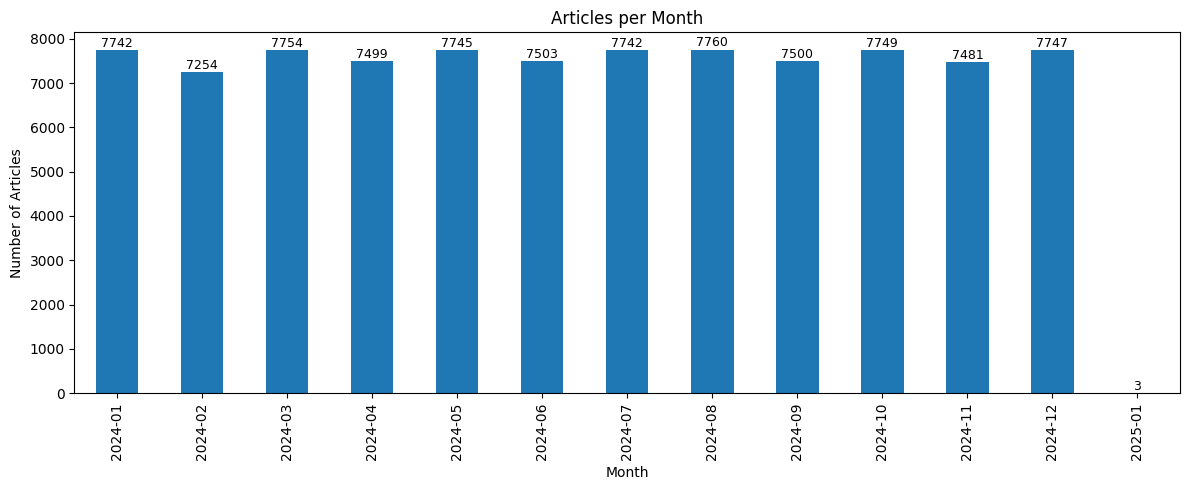

In [ ]:
# Create a new column for the month (e.g., '2025-08')
df['month'] = df['seendate'].dt.to_period('M')

# Group by month and count the number of articles per month
monthly_counts = df.groupby('month').size()

# Plot the number of articles per month
ax = monthly_counts.plot(kind='bar', figsize=(12,5), title='Articles per Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')

# Add count labels above each bar
for i, value in enumerate(monthly_counts):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Average number of articles each month

In [10]:
monthly_counts = monthly_counts.reset_index()
monthly_counts.columns=["Month", "Count"]


In [ ]:
# Calculate average number of articles per month (including Jan 2025)
print("Average number of articles per month including Jan 2025 : ", monthly_counts['Count'].mean())

# Calculate average number of articles per month (excluding Jan 2025, which may be incomplete)
print("Average number of articles per month excluding Jan 2025 : ", monthly_counts[monthly_counts['Month'] != '2025-01']['Count'].mean())

Average number of articles per month including Jan 2025 : 7036.846153846154
Average number of articles per month excluding Jan 2025 : 7623.0



### Publication Date range summary
The articles are in the Date range: 2024-01-01 00:00:00+00:00 to 2025-01-01 00:15:00+00:00

### Average number of articles per month including Jan 2025
7036.84

### Average number of articles per month excluding Jan 2025
As observed in date range articles are fetched till 01-Jan-2025, 15:00:00+00:00 UTC. And 3 articles are observed in Jan 2025, and can be seen in this 15 mins. So articles are not present for the entire month of Jan 2025. Therefore including this while calculating average articles per month is not correct and it skews the average articles per month.


7623.0

## 7. Title Length Analysis

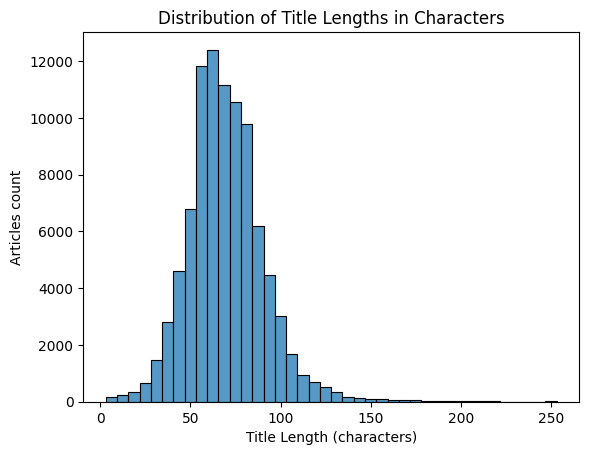

In [ ]:
# Calculate the length of each article title in characters
df['title_length_characters'] = df['title'].astype(str).apply(len)

# Plot histogram to show the distribution of title lengths (in characters)
sns.histplot(df['title_length_characters'], bins=40)
plt.title('Distribution of Title Lengths in Characters')
plt.xlabel('Title Length (characters)')
plt.ylabel('Articles count')
plt.show()

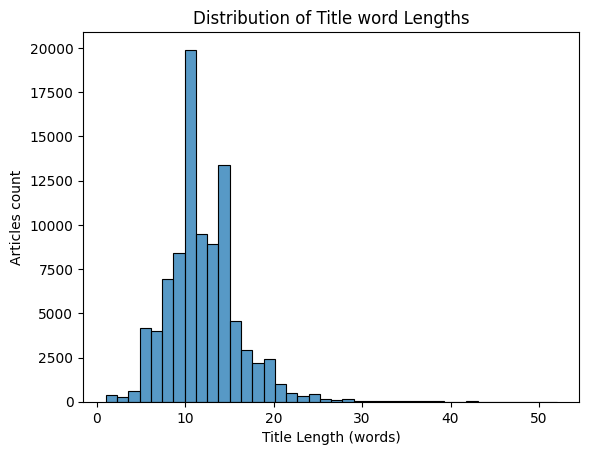

In [ ]:
# Calculate the number of words in each article title
df['title_word_count'] = df['title'].astype(str).apply(lambda x: len(x.split()))

# Plot histogram to show the distribution of title word counts
sns.histplot(df['title_word_count'], bins=40)
plt.title('Distribution of Title Word Lengths')
plt.xlabel('Title Length (words)')
plt.ylabel('Articles count')
plt.show()

In [ ]:
# Calculate and print the average title length in characters
print('Average title length in characters:', df['title_length_characters'].mean())

# Calculate and print the average title length in words
print('Average title length in words:', df['title_word_count'].mean())

Average title length in characters: 69.53827654434352
Average title length in Words: 12.007979973545842


In [60]:
df[['title_length_characters','title_word_count']].describe()

,title_length_characters,title_word_count
count,91479.000000,91479.000000
mean,69.538277,12.007980
std,21.456315,4.107625
min,3.000000,1.000000
25%,56.000000,9.000000
50%,68.000000,12.000000
75%,81.000000,14.000000
max,253.000000,52.000000


### Average title length of the articles 
1. Characters : On average the title contains 69 characters. And also can be seen that 25 percentile is 56 characters and 75 percentile is 81 characters. which shows most articles have characters in the range 56-81 characters.

2. Words = On average the title contains 12 words. And also can be seen that 25 percentile is 9 words and 75 percentile is 14 words. which shows most articles have word count in this range of 9-14 words.

## 8. Language & Country Distribution

In [ ]:
# Get the top 10 most common languages in the dataset
lang_counts = df['language'].value_counts().head(10)

# Get the top 10 most common source countries in the dataset
country_counts = df['sourcecountry'].value_counts().head(10)

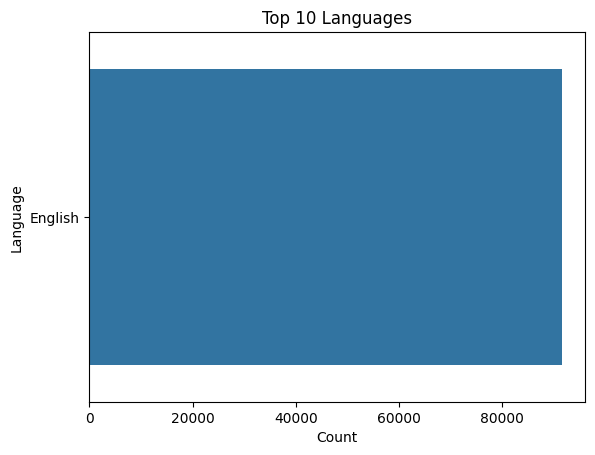

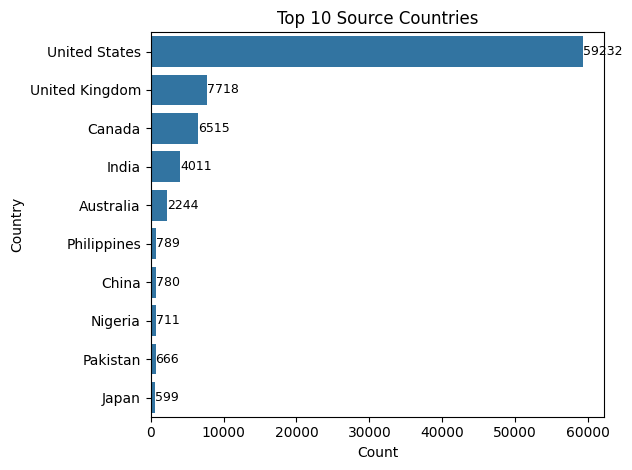

In [ ]:
# Plot the distribution of articles by language (top 10)
sns.barplot(x=lang_counts.values, y=lang_counts.index)
plt.title('Top 10 Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

# Plot the distribution of articles by source country (top 10)
ax = sns.barplot(x=country_counts.values, y=country_counts.index)
ax.set_title('Top 10 Source Countries')
ax.set_xlabel('Count')
ax.set_ylabel('Country')

# Add count labels to each bar
for i, value in enumerate(country_counts.values):
    ax.text(value + 1, i, str(value), va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Summary of Language and Source country
- All the articles are in English Language.
- All the articles predominently come from the US, followed by UK, Canada, India, Australia.

## 9. Domain Distribution

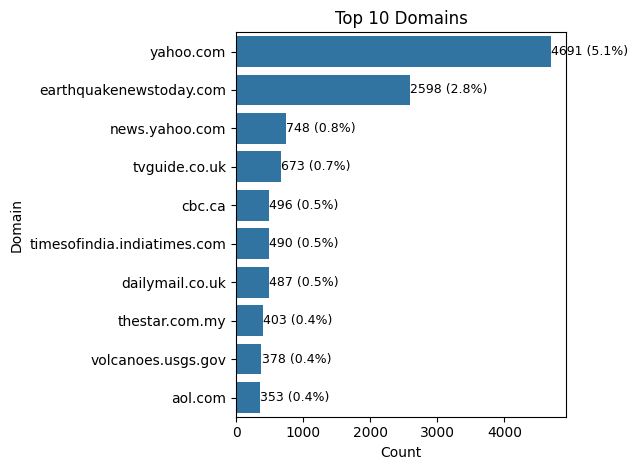

In [ ]:
# Get the top 10 domains that articles belong to
domain_counts = df['domain'].value_counts().head(10)
total = df['domain'].count()  # Total number of articles with a domain

# Plot the distribution of articles by domain (top 10)
ax = sns.barplot(x=domain_counts.values, y=domain_counts.index)
ax.set_title('Top 10 Domains')
ax.set_xlabel('Count')
ax.set_ylabel('Domain')

# Add count and percentage labels to each bar
for i, value in enumerate(domain_counts.values):
    pct = (value / total) * 100
    ax.text(value + 1, i, f"{value} ({pct:.1f}%)", va='center', fontsize=9)

plt.tight_layout()
plt.show()

### Domain summary
- It can be observed that 5.1 % of articles source domain is yahoo.com and 2.8 % of articles source domain is earthquakenewstoday.com and remaining articles source domains related to news channel etc is less than 1% respectively.